<div align="center">

# RIO Airbnb Project - Exploratory Data Analysis
**Latest Update:** *10th December 2022*

</div>

---

#### **Import required libraries & dataset**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

import airbnblib.cleaning as cln

listings_df = pd.read_csv("dataset/cleaned_listings.csv")

<div align="center">

## Price
---

#### **Price histogram**

<AxesSubplot: xlabel='price', ylabel='Count'>

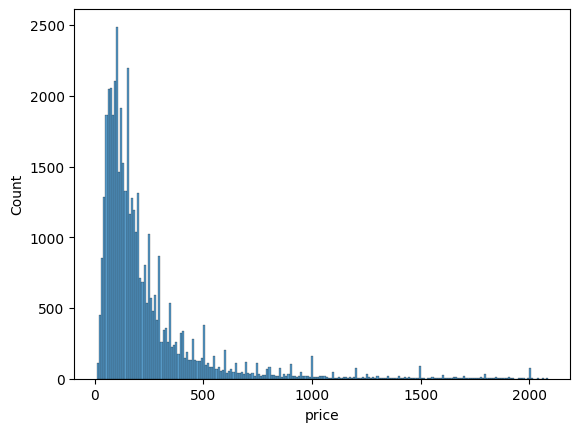

In [2]:
sns.histplot(data=listings_df['price'])

<div align="center">

## Null Values
</div>

---

#### **Columns with null values**

<AxesSubplot: >

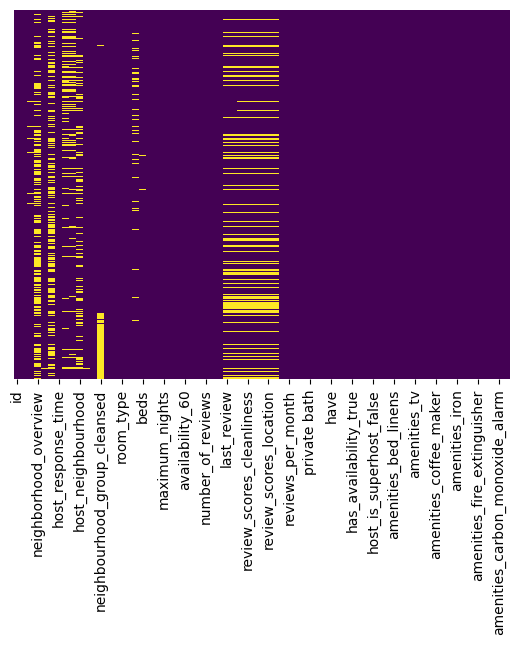

In [3]:
sns.heatmap(listings_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [4]:
for col in listings_df.columns.to_list():
    null = len([i for i in listings_df[col].isnull() if i])
    
    if null > 0:
        print(f"Null values in '{col}': {round(null/len(listings_df[col].to_list()) * 100,2)}%")

Null values in 'name': 0.0%
Null values in 'description': 1.79%
Null values in 'neighborhood_overview': 41.25%
Null values in 'host_since': 0.03%
Null values in 'host_about': 41.93%
Null values in 'host_response_rate': 19.31%
Null values in 'host_acceptance_rate': 17.35%
Null values in 'host_neighbourhood': 21.61%
Null values in 'host_has_profile_pic': 0.03%
Null values in 'neighbourhood_group_cleansed': 17.38%
Null values in 'bedrooms': 8.25%
Null values in 'beds': 1.7%
Null values in 'last_review': 22.61%
Null values in 'review_scores_rating': 22.61%
Null values in 'review_scores_accuracy': 23.16%
Null values in 'review_scores_cleanliness': 23.16%
Null values in 'review_scores_checkin': 23.17%
Null values in 'review_scores_communication': 23.16%
Null values in 'review_scores_location': 23.18%
Null values in 'review_scores_value': 23.18%


<div align='center'>

## Amenities
---

In [15]:
df_copy = listings_df.copy()
all_amenities = [col for col in listings_df.columns.to_list() if 'amenities' in col]
# for col in all_amenities:
#     df_copy[col.replace('amenities_','')] = df_copy[col].to_list()

<AxesSubplot: >

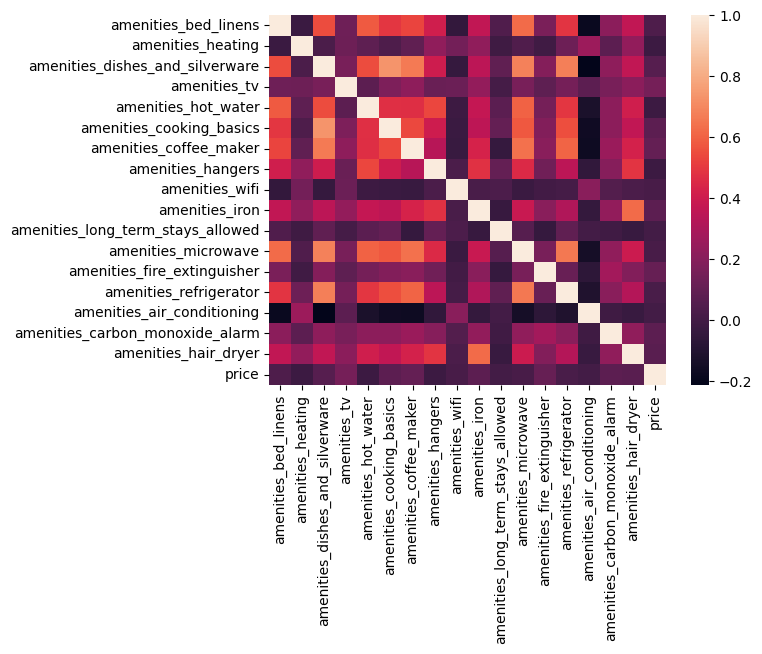

In [8]:
sns.heatmap(df_copy[all_amenities + ['price']].corr(),yticklabels='auto',xticklabels='auto')

#### **Regressional analysis**

In [46]:
x = df_copy[all_amenities]
y = df_copy['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=69)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [47]:
pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Corefficients'])

,Corefficients
amenities_bed_linens,8.139693
amenities_heating,-22.185902
amenities_dishes_and_silverware,-0.101614
amenities_tv,82.660004
amenities_hot_water,-35.024396
amenities_cooking_basics,38.557099
amenities_coffee_maker,56.090120
amenities_hangers,-45.317244
amenities_wifi,8.902545
amenities_iron,18.887014


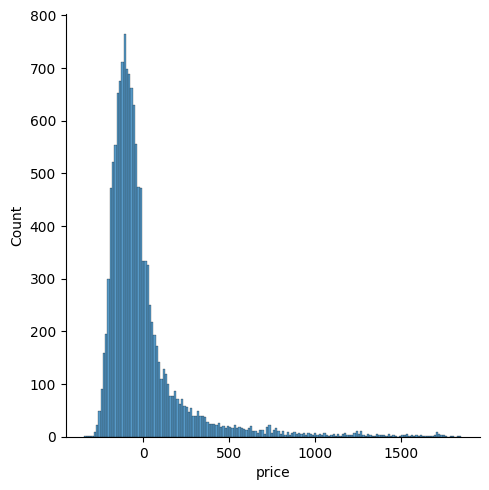

In [51]:
predictions = lin_reg.predict(x_test)
sns.displot((y_test-predictions))

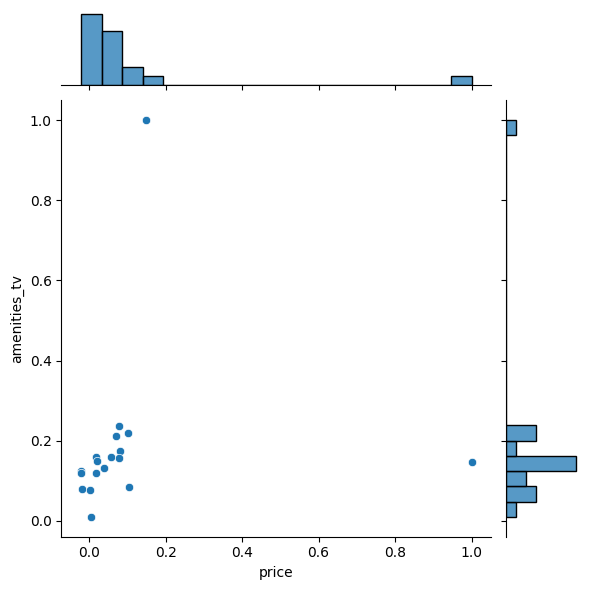

In [54]:
sns.jointplot(data=df_copy[all_amenities + ['price']].corr(),x='price',y='amenities_tv')